In [1]:
from batches_SCE_VCG_multiprocessing import *

# agent_num,bid_num,cycle,n,min_t = 20,3,5,4,10          
#agents,bids,cycle,批次,计算的最小规模控制数
# agent_num,bid_num,cycle,n,min_t = 20,3,20,5,5
# agent_num,bid_num,cycle,n,min_t = 120,3,20,3,40
# # agent_num,bid_num,cycle,n,min_t = 120,3,20,6,40
# self_bid_range,other_bid_range,platform_bid_range = [0,20],[10,50],[10,50]

In [2]:
agent_num,bid_num,min_t,cycle = 120,3,40,20
n1,n2,n3= 3,6,12

read_batches1 = read_pkl('分批SCE-VCG',agent_num,bid_num,n1)       #传参 名字，代理人数量，原子投标数，分批批次
read_SCE_VCG1 = read_pkl('整批SCE-VCG',agent_num,bid_num,n1)

read_batches2 = read_pkl('分批SCE-VCG',agent_num,bid_num,n2)       #传参 名字，代理人数量，原子投标数，分批批次
read_SCE_VCG2 = read_pkl('整批SCE-VCG',agent_num,bid_num,n2)

read_batches3 = read_pkl('分批SCE-VCG',agent_num,bid_num,n3)       #传参 名字，代理人数量，原子投标数，分批批次
read_SCE_VCG3 = read_pkl('整批SCE-VCG',agent_num,bid_num,n3)

read_SCE_VCG = read_SCE_VCG1

In [3]:
b_W_N1,b_PS1,b_AP1,b_RE1,b_PE1 = {},{},{},{},{}
b_W_N2,b_PS2,b_AP2,b_RE2,b_PE2 = {},{},{},{},{}
b_W_N3,b_PS3,b_AP3,b_RE3,b_PE3 = {},{},{},{},{}
W_N,PS,AP,RE,PE = {},{},{},{},{}

for t in reversed(range(min_t,agent_num+1)):
    b_W_N1[t],b_PS1[t],b_AP1[t],b_RE1[t],b_PE1[t] = 0,0,0,0,0
    b_W_N2[t],b_PS2[t],b_AP2[t],b_RE2[t],b_PE2[t] = 0,0,0,0,0
    b_W_N3[t],b_PS3[t],b_AP3[t],b_RE3[t],b_PE3[t] = 0,0,0,0,0
    W_N[t],PS[t],AP[t],RE[t],PE[t] = 0,0,0,0,0
    for c in range(cycle):
        value1,value2,value3,value4 = read_batches1[c][t],read_batches2[c][t],read_batches3[c][t],read_SCE_VCG[c][t]
#         print(c,value1[0])
        b_W_N1[t] += value1[0]
        b_PS1[t] += value1[1]
        b_AP1[t] += value1[2]
        b_RE1[t] += value1[3]
        b_PE1[t] += value1[4]
        
        b_W_N2[t] += value2[0]
        b_PS2[t] += value2[1]
        b_AP2[t] += value2[2]
        b_RE2[t] += value2[3]
        b_PE2[t] += value2[4]
        
        b_W_N3[t] += value3[0]
        b_PS3[t] += value3[1]
        b_AP3[t] += value3[2]
        b_RE3[t] += value3[3]
        b_PE3[t] += value3[4]
        
        W_N[t] += value4[0]
        PS[t] += value4[1]
        AP[t] += value4[2]
        RE[t] += value4[3]
        PE[t] += value4[4]
#     print(b_W_N[t])    
    b_W_N1[t] /= cycle
    b_PS1[t] /= cycle
    b_AP1[t] /= cycle
    b_RE1[t] /= cycle
    b_PE1[t] /= cycle
    
    b_W_N2[t] /= cycle
    b_PS2[t] /= cycle
    b_AP2[t] /= cycle
    b_RE2[t] /= cycle
    b_PE2[t] /= cycle
    
    b_RE2[t] /= 2    #分6批拍卖的数据要在原本的数据上多除2，有时间重新计算一次
    b_PE2[t] /= 2
    
    b_W_N3[t] /= cycle
    b_PS3[t] /= cycle
    b_AP3[t] /= cycle
    b_RE3[t] /= cycle
    b_PE3[t] /= cycle
    
    W_N[t] /= cycle
    PS[t] /= cycle
    AP[t] /= cycle
    RE[t] /= cycle
    PE[t] /= cycle
    
t = [i for i in reversed(range(min_t,agent_num+1))]
b_W_N1 = list(b_W_N1.values())
b_PS1 = list(b_PS1.values())
b_AP1 = list(b_AP1.values())
b_RE1 = list(b_RE1.values())
b_PE1 = list(b_PE1.values())

b_W_N2 = list(b_W_N2.values())
b_PS2 = list(b_PS2.values())
b_AP2 = list(b_AP2.values())
b_RE2 = list(b_RE2.values())
b_PE2 = list(b_PE2.values())

b_W_N3 = list(b_W_N3.values())
b_PS3 = list(b_PS3.values())
b_AP3 = list(b_AP3.values())
b_RE3 = list(b_RE3.values())
b_PE3 = list(b_PE3.values())

W_N = list(W_N.values())
PS = list(PS.values())
AP = list(AP.values())
RE = list(RE.values())
PE = list(PE.values())

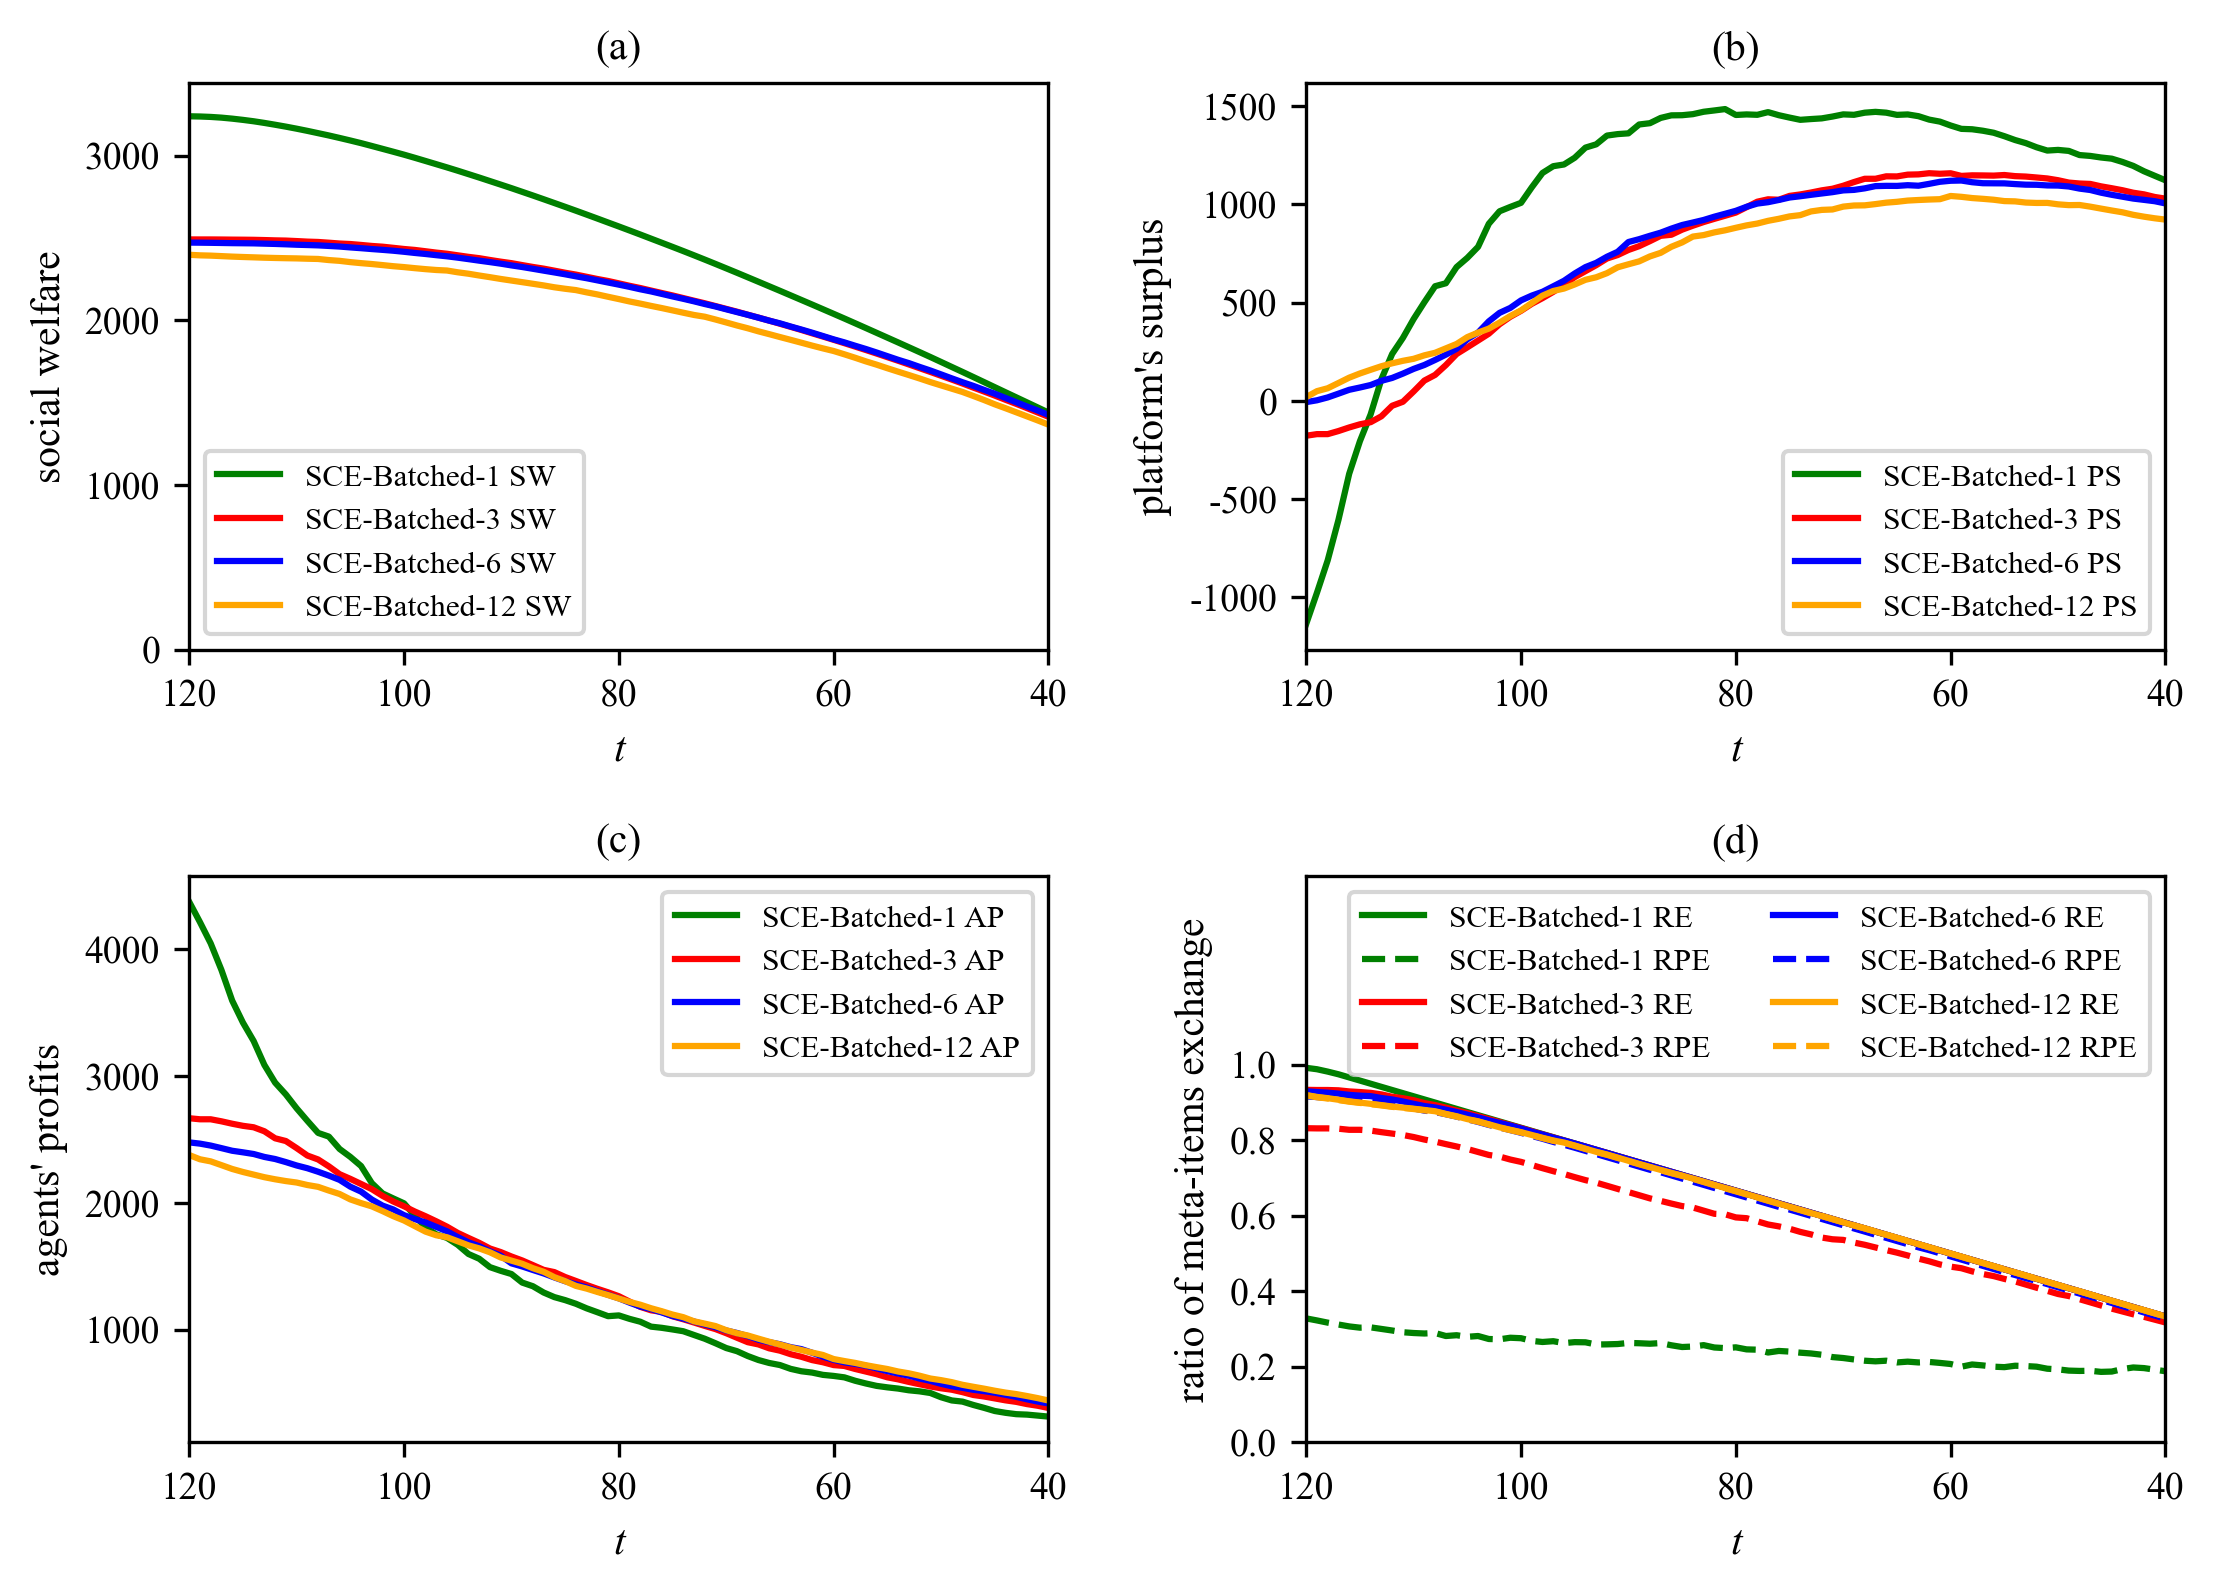

In [7]:
# 画图
plt.figure('Fig_test', figsize = (8.5, 6),dpi = 300)
line_style = ['-', '--']
# colors = ["#d5695d","#5d8ca8","#65a479","#a564c9"]

plt.subplot(221)
y_max = max(max(b_W_N1),max(b_W_N2),max(W_N))    
plt.plot(t, W_N, c='green', label='SCE-Batched-1 SW', linestyle=line_style[0])
plt.plot(t, b_W_N1, c='red', label='SCE-Batched-3 SW', linestyle=line_style[0])
plt.plot(t, b_W_N2, c='blue', label='SCE-Batched-6 SW', linestyle=line_style[0])
plt.plot(t, b_W_N3, c='orange', label='SCE-Batched-12 SW', linestyle=line_style[0])
plt.yticks(fontproperties = 'Times New Roman', size = 9)
plt.xticks(fontproperties = 'Times New Roman', size = 9)
plt.xlim(min_t,agent_num)
plt.ylim(0,y_max+200)
plt.legend(loc='best',prop={'family' : 'Times New Roman','size':7.5},ncol =1)
plt.grid(False)
plt.xlabel("t", fontdict={'family' : 'Times New Roman','size': 10,'style':'italic'})
plt.ylabel("social welfare", fontdict={'family' : 'Times New Roman','size': 10})
plt.title("(a)", fontdict={'family' : 'Times New Roman','size': 10})     
plt.gca().invert_xaxis()

plt.subplot(222)          
y_max = max(max(b_PS1),max(b_PS2),max(PS)) 
plt.plot(t, PS, c='green', label="SCE-Batched-1 PS", linestyle=line_style[0])
plt.plot(t, b_PS1, c='red', label="SCE-Batched-3 PS", linestyle=line_style[0])
plt.plot(t, b_PS2, c='blue', label="SCE-Batched-6 PS", linestyle=line_style[0])
plt.plot(t, b_PS3, c='orange', label="SCE-Batched-12 PS", linestyle=line_style[0])
plt.yticks(fontproperties = 'Times New Roman', size = 9)
plt.xticks(fontproperties = 'Times New Roman', size = 9)
plt.legend(loc='best',prop={'family' : 'Times New Roman','size':7.5})
plt.xlim(min_t,agent_num)
plt.grid(False)
plt.xlabel("t", fontdict={'family' : 'Times New Roman','size': 10,'style':'italic'})
plt.ylabel("platform's surplus", fontdict={'family' : 'Times New Roman','size': 10})
plt.title("(b)", fontdict={'family' : 'Times New Roman','size': 10})     
plt.gca().invert_xaxis()

plt.subplot(223)   
y_max = 1
plt.plot(t, AP, c='green', label="SCE-Batched-1 AP", linestyle=line_style[0])
plt.plot(t, b_AP1, c='red', label="SCE-Batched-3 AP", linestyle=line_style[0])
plt.plot(t, b_AP2, c='blue', label="SCE-Batched-6 AP", linestyle=line_style[0])
plt.plot(t, b_AP3, c='orange', label="SCE-Batched-12 AP", linestyle=line_style[0])
plt.yticks(fontproperties = 'Times New Roman', size = 9)
plt.xticks(fontproperties = 'Times New Roman', size = 9)
plt.legend(loc='best',prop={'family' : 'Times New Roman','size':7.5})
plt.grid(False)
plt.xlim(min_t,agent_num)
plt.xlabel("t", fontdict={'family' : 'Times New Roman','size': 10,'style':'italic'})
plt.ylabel("agents' profits", fontdict={'family' : 'Times New Roman','size': 10})
plt.title("(c)", fontdict={'family' : 'Times New Roman','size': 10})     
plt.gca().invert_xaxis()

plt.subplot(224)  
y_max = 1  
plt.plot(t, RE, c='green', label='SCE-Batched-1 RE', linestyle=line_style[0])
plt.plot(t, PE, c='green', label='SCE-Batched-1 RPE', linestyle=line_style[1])
plt.plot(t, b_RE1, c='red', label="SCE-Batched-3 RE", linestyle=line_style[0])
plt.plot(t, b_PE1, c='red', label="SCE-Batched-3 RPE", linestyle=line_style[1])

plt.plot(t, b_RE2, c='blue', label="SCE-Batched-6 RE", linestyle=line_style[0])
plt.plot(t, b_PE2, c='blue', label="SCE-Batched-6 RPE", linestyle=line_style[1])

plt.plot(t, b_RE3, c='orange', label="SCE-Batched-12 RE", linestyle=line_style[0])
plt.plot(t, b_PE3, c='orange', label="SCE-Batched-12 RPE", linestyle=line_style[1])

plt.yticks(fontproperties = 'Times New Roman', size = 9)
plt.xticks(fontproperties = 'Times New Roman', size = 9)
plt.legend(loc='best',prop={'family' : 'Times New Roman','size':7.5},ncol = 2)
plt.grid(False)
plt.xlim(min_t,agent_num)
plt.ylim(0,1.5)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0])
plt.xlabel("t", fontdict={'family' : 'Times New Roman','size': 10,'style':'italic'})
plt.ylabel("ratio of meta-items exchange", fontdict={'family' : 'Times New Roman','size': 10})
plt.title("(d)", fontdict={'family' : 'Times New Roman','size': 10})     
plt.gca().invert_xaxis()


plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# plt.autofmt_xdate()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)
path = './pic/'
pic_name = path + str(agent_num) + '_' + str(bid_num) + 'Fig分批拍卖' +str(n1)+'_'+str(n2)+'_'+str(n3)+ '.png'
plt.savefig(pic_name,dpi = 300,bbox_inches ="tight",transparent = True)
plt.show()

In [8]:
pic_name

'./pic/120_3Fig分批拍卖3_6_12.png'